
# My Tasks Notebook

**Rachel King**

***

This notebook contains all the tasks associated with Applied Statistics Module undertaken as part of the Higher Diploma in Science in Data Analytics, Winter 2023

1. [permutation and Combinations](#task-1---permutations-and-combinations)
2. [numpy's Normal Distribution](#task-2---numpy's-normal-distribution)
3. [t-Test Calculation](#task-3---t-Test-Calculation)
4. [ANOVA](#task-4---anova)

## Module Imports

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

import statistics

import seaborn as sns

## Task 1 - Permutations and Combinations

Lady Tasting Tea Experiment altered to involve 12 cups (number_cups) - 6 with milk in first (number_cups_milk_first) and 6 with tea in first (number_cups_tea_first)

In [2]:
number_cups = 12

number_cups_milk_first = 6

number_cups_tea_first = 6

math.comb(n, k)

Calculate the number of ways to choose k elements from a set of n elements where the order of the chosen elements does not matter and no element is selected more than once.

n = number of cups of tea in total = 12
k = number of cups with milk in first = 6

In [3]:
# Number of ways of selecting four cups from eight.
ways = math.comb(number_cups, number_cups_milk_first)

# Show.
ways

924

In [4]:
# The cup labels.
labels = list(range(number_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [5]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, number_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [6]:
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 2, 7, 8, 10, 11]

In [7]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {1, 2} 2
(0, 1, 2, 3, 4, 6) {1, 2} 2
(0, 1, 2, 3, 4, 7) {1, 2, 7} 3
(0, 1, 2, 3, 4, 8) {8, 1, 2} 3
(0, 1, 2, 3, 4, 9) {1, 2} 2
(0, 1, 2, 3, 4, 10) {1, 2, 10} 3
(0, 1, 2, 3, 4, 11) {1, 2, 11} 3
(0, 1, 2, 3, 5, 6) {1, 2} 2
(0, 1, 2, 3, 5, 7) {1, 2, 7} 3
(0, 1, 2, 3, 5, 8) {8, 1, 2} 3
(0, 1, 2, 3, 5, 9) {1, 2} 2
(0, 1, 2, 3, 5, 10) {1, 2, 10} 3
(0, 1, 2, 3, 5, 11) {1, 2, 11} 3
(0, 1, 2, 3, 6, 7) {1, 2, 7} 3
(0, 1, 2, 3, 6, 8) {8, 1, 2} 3
(0, 1, 2, 3, 6, 9) {1, 2} 2
(0, 1, 2, 3, 6, 10) {1, 2, 10} 3
(0, 1, 2, 3, 6, 11) {1, 2, 11} 3
(0, 1, 2, 3, 7, 8) {8, 1, 2, 7} 4
(0, 1, 2, 3, 7, 9) {1, 2, 7} 3
(0, 1, 2, 3, 7, 10) {1, 2, 10, 7} 4
(0, 1, 2, 3, 7, 11) {1, 2, 11, 7} 4
(0, 1, 2, 3, 8, 9) {8, 1, 2} 3
(0, 1, 2, 3, 8, 10) {8, 1, 2, 10} 4
(0, 1, 2, 3, 8, 11) {8, 1, 2, 11} 4
(0, 1, 2, 3, 9, 10) {1, 2, 10} 3
(0, 1, 2, 3, 9, 11) {1, 2, 11} 3
(0, 1, 2, 3, 10, 11) {11, 1, 2, 10} 4
(0, 1, 2, 4, 5, 6) {1, 2} 2
(0, 1, 2, 4, 5, 7) {1, 2, 7} 3
(0, 1, 2, 4, 5, 8) {8, 1, 2} 3
(0, 1, 2, 4, 5

In [8]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

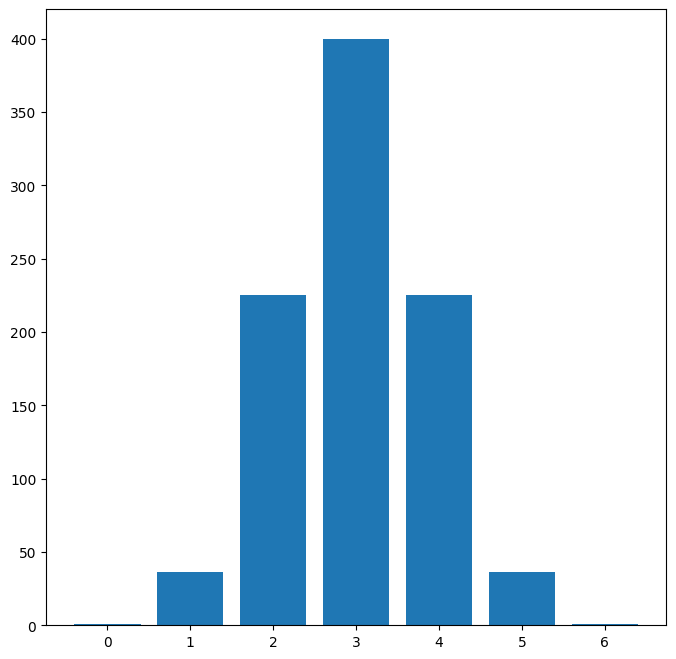

In [9]:
# Create a figure.
fig, ax = plt.subplots(figsize=(8, 8))

# Bar chart.
ax.bar(counts[0], counts[1]);

### The Null Hypothesis
 The lady has no special power to tell the difference, she is selecting 6 cups at random.

### Alternative Hypothesis
If she is picking 6 cups at random, it is unlikely she will select the correct 6. The probability is 1 in 924. Therefore, it is so unlikely, that if she does select the correct 6 cups, we are willing to accept that something non-random is happening.

In [10]:
# The probability that she (randomly) selects the 6 cups correctly
1 / 924

0.0010822510822510823

We are willing to accept one error - this means if she selects at least 5 of the cups correctly, we will reject the null hypothesis and accept that something non-random is happening in terms of selecting the cups (she is not just guessing and indeed has special powers).

In [11]:
# The probability that she (randomly) selects at least 5 cups correctly
(36 + 1) / 924

0.04004329004329004

Would two errors be acceptable (i.e at least 4 correct cups are selected) ? In other words, would we be happy to reject the null hypothesis if she selected at least 4 cups correctly?

In [12]:
# The probability that she (randomly) selects at least 4 cups correctly
(225 + 36 + 1) / 924

0.28354978354978355

The probability of randomly selecting at least 4 correct cups is greater than 1 in 4. This means that more than once every 4 times this experiment is carried out the lady will select at least 4 of the cups correctly. This would not be acceptable in terms of rejecting the null hypothesis.

## Task 2 - numpy's Normal Distribution

This task involves assessing whether numpy.random.normal() properly generates normal values. To begin, a sample of one hundred thousand values is generated using the function with mean 10.0 and standard deviation 3.0.

The scipy.stats.shapiro() function is used to test whether the sample came from a normal distribution.

Finally, a histogram of the values and the corresponding normal distribution probability density function are plotted together.

In [ ]:
# Generate a random normal sample
data = np.random.normal(10.0, 3.0, size=100000)

# Show the data
data

array([ 8.55062876, 11.62468497, 10.2420841 , ...,  5.88559737,
       10.68957517, 12.66354448])

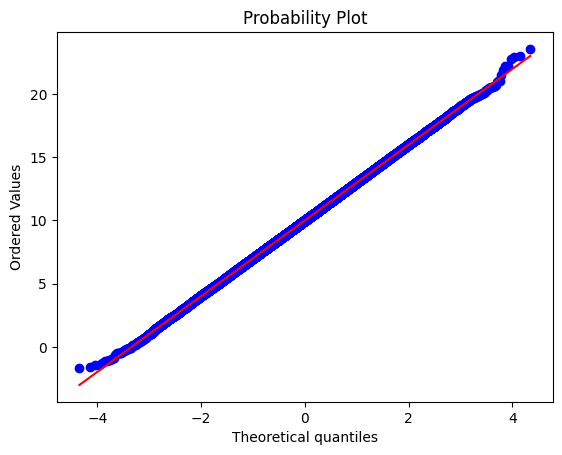

In [14]:
# Create an empty plot
fig, ax = plt.subplots()

# Create a q-q plot
stats.probplot(data, dist='norm', plot=ax);

In [15]:
# Perform the Shapiro Wilk test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

stats.shapiro(data)

c:\Users\rking\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999790191650391, pvalue=0.8939462304115295)

Data is normally distributed, 0.99999

Statistic means ....

An acceptable p-value to reject the null hypothesis is typically 0.05 (representing a Confidence Interval of 95%). Given a null hypothesis was that the data is normally distributed, these results would mean we would have no reason to reject the null hypothesis.

### Histogram of Values and Corresponding Normal Distribution Probability Density Function 

In [16]:
# define the function with mean 10.0 and standard deviation of 3.0 
def f(x, mu=10.0, sigma=3.0):
  # The normalisation constant
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # f(x)
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

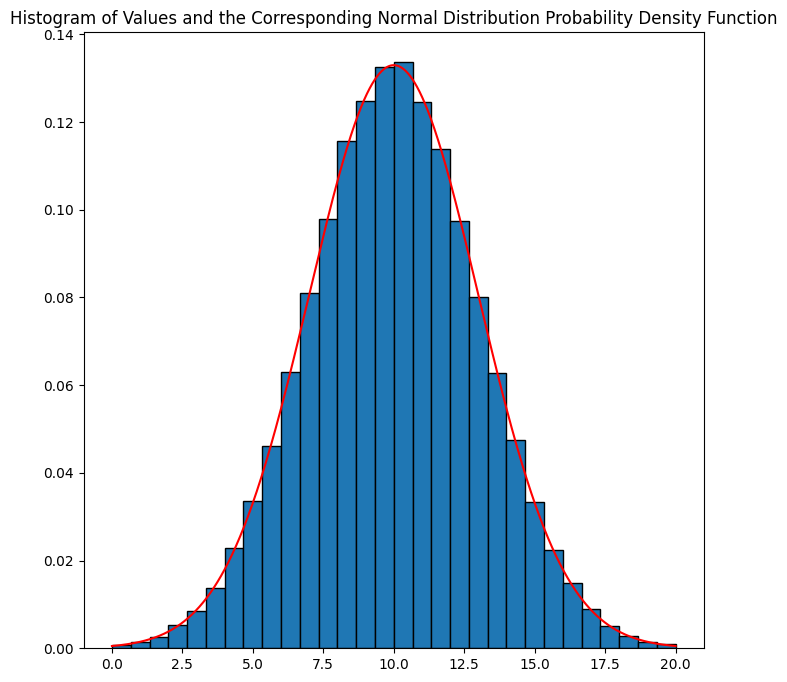

In [17]:
# Create a blank plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create a histogram
ax.hist(data, edgecolor='black', density=True, bins=np.linspace(0, 20, 31));

# Create an x range for my values
x = np.linspace(0, 20, 100001)

# Get y values
y = f(x, mu=10.0, sigma=3.0)

# Plot the function
ax.plot(x, y, 'r-')
ax.set_title('Histogram of Values and the Corresponding Normal Distribution Probability Density Function');

## Task 3 - t-Test Calculation

This task invovles considering the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID | Before | After |
| ---------- | ------ | ----- |
| 0 | 63 | 64 |
| 1 | 68 | 64 |
| 2 | 70 | 68 |
| 3 | 64 | 64 |
| 4 | 74 | 73 |
| 5 | 67 | 70 |
| 6 | 70 | 72 |
| 7 | 57 | 54 |
| 8 | 66 | 61 |
| 9 | 65 | 63 |

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

A t-test is a statistical method that determines whether there is a significant difference between the means of two groups.

*Null Hypothesis* : The population means are equal

In [18]:
# create a numpy array for each set of data
rhr_before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
rhr_after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

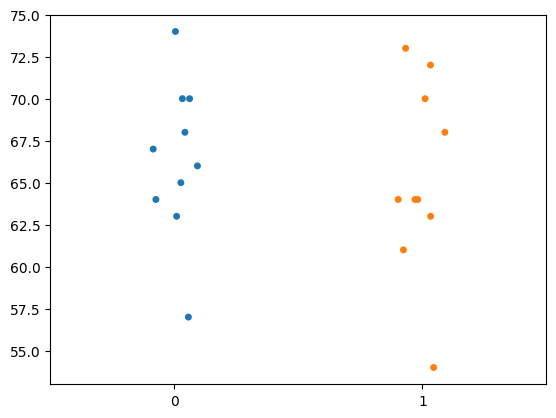

In [21]:
# Strip plot.
sns.stripplot(data=[rhr_before, rhr_after]);

#### t-statistic using Numpy

In [19]:
# calculate the t-statistic using numpy
# https://stackoverflow.com/questions/2324438/how-to-calculate-the-statistics-t-test-with-numpy

difference = rhr_before - rhr_after

t = (np.mean(difference))/(difference.std(ddof=1)/np.sqrt(len(difference)))

s = np.random.standard_t(len(difference), size=100000)
p = np.sum(s<t) / float(len(s))

print(f't value = {t}')
print(f'p value = {2 * min(p, 1 - p)}')

t value = 1.3372274824806283
p value = 0.21282


#### t-statistic using Scipy Stats

We will calculate the t-statistic using scipy.stats/ttest_rel . This is a test for the null hypothesis that two related samples have the same mean. The samples are related in this instance as the values for resting heart rate taken before and after are taken from the same subject.

In [23]:
# Perform a paired samples t-test using Scipy stats
stats.ttest_rel(rhr_before, rhr_after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

The t-statistic returned by Scipy Stats is 1.337, with a p-value of 0.21. The t-statistic returned by using Numpy is 1.337, with a p-value of 0.21. The results returned using Numpy are extremely similar to these values.

An acceptable p-value to reject the null hypothesis is typically 0.05 (representing a Confidence Interval of 95%). With p-values returned of 0.64 by Scipy stats and 0.21 by Numpy, this would indicate there is no evidence to reject the null hypothesis and that there is no statistically significant difference between the 2 sets of data

There are a number of assumptions required for the t-test to generate valid results.

These are:
- Independence of observations
- Normality
- Equal variances

## Task 4 - ANOVA